# CA1_DataPrep_HDip
Student: ANA PAULA RODRIGUES DE SOUZA

Student code: 2022205

Lecturer: DAVID MCQUAID

Module: DATA PREPARATION

### Scenario: 
You have been retained by a haulage company to analyse a dataset based on data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. The dataset’s positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS. The data consists of a subset of all available data, selected by experts. This analysis will help determine the investment strategy for the company in the upcoming year. All data wrangling, analysis, and visualizations must be generated using python. The companies CTO also requires you to rationalize all the decisions that you have made in your report. 


### Requirements :
You are required to use the dataset contained within the file “aps_failure_set.csv”, conduct the following analysis and report on your findings: Characterisation of the data set: size; number of attributes; has/does not have missing values, number of observations etc. Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it. Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. Include a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it. Explain in your own words what the “Curse of Dimensionality ” is. Conclusions, Findings of data set and references (HARVARD style). Note that all written work MUST be completed in Jupyter Notebook Markdown (please review “Jupyter Notebook Tutorial” Notes in Moodle if you are unsure of this). All Code must be included in code blocks (As normal). No other upload will be accepted. All written work MUST be detailed in your Jupyter Markdown (NOT in code comments).



## Reading Data

To perform the following analysis and report my findings, such as: 

- Characterization of the dataset: size; number of attributes; 
- Has/does not have missing values, number of observations, etc. 

The dataset contained in the is file “aps_failure_set.csv”. And the library can help us to offres several paths to solving our first problem.

In [84]:
import pandas as pd
import numpy as np
from numpy import count_nonzero
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preproc
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy import sparse

* The first of all steps will be to load the raw data.

In [85]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df_aps_raw = pd.read_csv("aps_failure_set.csv", na_values = missing_value_formats)
df_aps_raw.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [86]:
df_aps_raw.shape

(60000, 171)

* The shape function applied first is the fastest and returns the number of rows and columns in that order.This dataset presents 171 columns of variables 60000 rows of observations.

# EDA - Exploratory Data Analysis

* This method "info" returns information about the DataFrame, such as index dtype and columns, non-null values, and memory usage" 

In [87]:
df_aps_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [88]:
df_aps_raw.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #   Column  Dtype  
---  ------  -----  
 0   class   object 
 1   aa_000  int64  
 2   ab_000  float64
 3   ac_000  float64
 4   ad_000  float64
 5   ae_000  float64
 6   af_000  float64
 7   ag_000  float64
 8   ag_001  float64
 9   ag_002  float64
 10  ag_003  float64
 11  ag_004  float64
 12  ag_005  float64
 13  ag_006  float64
 14  ag_007  float64
 15  ag_008  float64
 16  ag_009  float64
 17  ah_000  float64
 18  ai_000  float64
 19  aj_000  float64
 20  ak_000  float64
 21  al_000  float64
 22  am_0    float64
 23  an_000  float64
 24  ao_000  float64
 25  ap_000  float64
 26  aq_000  float64
 27  ar_000  float64
 28  as_000  float64
 29  at_000  float64
 30  au_000  float64
 31  av_000  float64
 32  ax_000  float64
 33  ay_000  float64
 34  ay_001  float64
 35  ay_002  float64
 36  ay_003  float64
 37  ay_004  float64
 38  ay_005  float64
 39  ay_006  float64
 40  ay_

In [89]:
df_aps_raw.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [90]:
df_aps_raw.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


* This function applied to a data frame in this section is "describe" function. Its looks at another type of data summary that shows the following values for each variable: count, average, std, min, 25%, 50%, 75%, and max. This function summarizes the following main statistics for each column: central descriptive trend, dispersion and shape of data distribution.

In [91]:
df_aps_raw.describe(include=object)


,class
count,60000
unique,2
top,neg
freq,59000


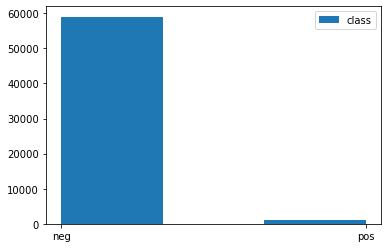

In [92]:
df_aps_raw["class"].hist(grid = False, xlabelsize = 10, ylabelsize = 10, legend = "class", bins = 3);

* About 84% of the "class" values are negative and only 16% show a positive association between defects and APS components.

In [93]:
df_aps_raw.duplicated().sum()
print("There are a total of " + (str(df_aps_raw.duplicated().sum()) + " duplicates in the dataset."))

There are a total of 0 duplicates in the dataset.


In [94]:
df_aps_raw["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [95]:
df_count_nulls = df_aps_raw.isnull().sum().to_frame().iloc[1:] 
df_count_nulls['columns'] = df_count_nulls.index 
df_count_nulls.rename(columns={0: 'count'}, inplace=True) 
df_head_10 = df_count_nulls.sort_values(by="count", ascending=False).head(10) 

<AxesSubplot:xlabel='columns', ylabel='count'>

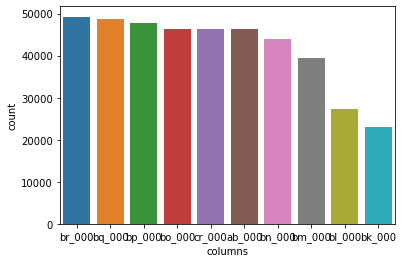

In [96]:
sns.barplot(data=df_head_10, x="columns", y="count")

* This graph shows the top 10 of the missing values, there are plenty of missing values and this impact our analysis, then is important to treat this data.

In [97]:
df_aps_raw.isnull().values.any()

True

In [98]:
df_aps_raw.isna().values.any()

True

In [99]:
df_aps_raw.isna().sum().sum()

850015

In [100]:
df_aps_raw["class"].isna().sum().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

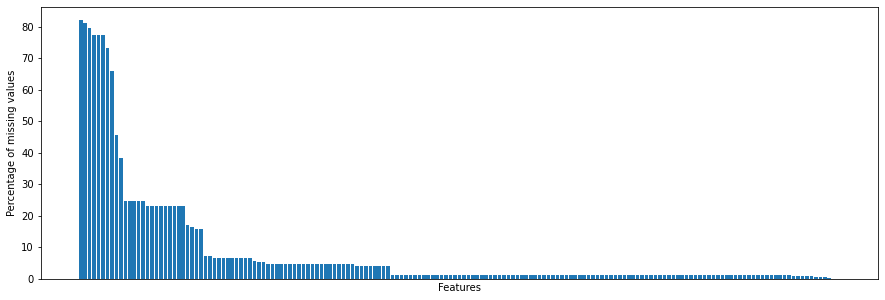

In [101]:
df_na = df_aps_raw.isna().sum().div(df_aps_raw.shape[0]).mul(100).to_frame().sort_values(by = 0, ascending = False)

fig, ax = plt.subplots(figsize = (15,5))
ax.bar(df_na.index, df_na.values.T[0])
plt.xticks([])
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")
plt.show

* The chart above shows that we have a significant amount of missing data. I drop columns with more than 75% missing values.

In [102]:
cols_na = df_na[df_na[0]>60]
print("There are " + str(len(cols_na)) + " columns with NaNs above 60%.")

There are 8 columns with NaNs above 60%.


In [103]:
cols_to_drop = list(cols_na.index)
cols_to_drop

['br_000',
 'bq_000',
 'bp_000',
 'bo_000',
 'ab_000',
 'cr_000',
 'bn_000',
 'bm_000']

In [104]:
df = df_aps_raw.drop(columns = ["br_000", "bq_000", "bp_000", "bo_000", "ab_000", "cr_000", "bn_000", "bm_000"]) 
df

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [105]:
df.isna().values.any()

True

In [106]:
df.isna().sum().sum()

481740

* To check if there are any other missing values in the updated dataset, the "isna" function was executed again with "some" and "sum" and the results are as expected. 
 The actual number of missing values in the entire dataset is 481740, about 5% of the actual data.

In [107]:
sparsity = 1 - count_nonzero(df) / df.size
print("Sparsity of the dataframe is: " + str(sparsity) + ".")

Sparsity of the dataframe is: 0.3293770961145194.


* After proceeding with  missing value processing, the sparsity of the data can be analyzed to determine next steps.


In [108]:
sparse.issparse(df)

False

In [109]:
# Assigning the independet variables to a new variable X

X = df.drop("class", axis = 1)

# Assigning the dependent variable to a new variable y

y = df["class"]

In [110]:
scaler = preproc.MinMaxScaler()
X = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X)
df_scaled.values

array([[2.79250729e-02, 9.99999832e-01, 3.26176944e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20361295e-02, 0.00000000e+00,            nan, ...,
        3.93692728e-04, 0.00000000e+00, 0.00000000e+00],
       [1.49423061e-02, 1.07006746e-07, 1.16491766e-08, ...,
        1.34905375e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.07782233e-05, 9.99999829e-01, 2.09685178e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.92336170e-02, 9.99999829e-01, 5.75469322e-08, ...,
        1.01945944e-01, 0.00000000e+00, 0.00000000e+00],
       [1.46444794e-02, 3.27590826e-07, 7.31568288e-08, ...,
        4.14689673e-05, 0.00000000e+00, 0.00000000e+00]])

In [111]:
lower_limit = df_scaled.mean() - 1.5 * df_scaled.std()
lower_limit

0     -0.057821
1     -0.392498
2     -0.007038
3     -0.011187
4     -0.015131
         ...   
157   -0.018781
158   -0.027795
159   -0.016487
160   -0.013408
161   -0.011373
Length: 162, dtype: float64

In [112]:
upper_limit = df_scaled.mean() + 1.5 * df_scaled.std()
upper_limit

0      0.101029
1      0.726673
2      0.007082
3      0.011835
4      0.016228
         ...   
157    0.024572
158    0.042195
159    0.020891
160    0.013784
161    0.011744
Length: 162, dtype: float64

In [113]:
display(df_scaled[~((df_scaled < upper_limit) & (df_scaled > lower_limit))])

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027923
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.046641,NaN,NaN,NaN
59996,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59997,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59998,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101946,NaN,NaN


In [114]:
df_scaled[df_scaled < lower_limit] = np.nan
df_scaled[df_scaled > upper_limit] = np.nan

In [115]:
df_scaled.isna().sum().sum()

692782

* The next step is to fill in the missing values ​​using the most appropriate method. In this case, they are replaced by the median to avoid disturbing the shape of the distribution. 
 Although the mean is sensitive to each value, some extreme values ​​do not significantly affect the median and are therefore known as a robust measure of the center.

In [116]:
column_medians = df_scaled.median()
df_scaled = df_scaled.fillna(column_medians)
display(df_scaled)

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,0.027925,3.473026e-08,3.261769e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.627842e-04,...,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.0
1,0.012036,0.000000e+00,1.467796e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,7.977081e-05,...,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.0
2,0.014942,1.070067e-07,1.164918e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,7.201835e-06,...,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.0
3,0.000004,3.285295e-08,7.688457e-09,0.0,0.000498,0.0,0.0,0.0,0.000005,9.666541e-06,...,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.0
4,0.022164,6.420405e-07,5.335323e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.911982e-04,...,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.055707,3.116337e-07,2.166747e-08,0.0,0.000000,0.0,0.0,0.0,0.000040,2.582697e-04,...,0.012812,0.015013,1.328221e-02,2.121074e-02,3.226316e-02,0.006002,0.000137,0.007503,0.000000,0.0
59996,0.000832,3.473026e-08,2.609416e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,4.544847e-07,...,0.000136,0.000179,2.174522e-04,1.191324e-03,4.302733e-06,0.000000,0.000000,0.000000,0.000000,0.0
59997,0.000041,3.473026e-08,2.096852e-09,0.0,0.000000,0.0,0.0,0.0,0.000000,1.223613e-07,...,0.000010,0.000010,4.652485e-06,2.507172e-06,4.619111e-06,0.000022,0.000000,0.000000,0.000000,0.0
59998,0.029234,3.473026e-08,5.754693e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.442115e-06,...,0.008974,0.005897,3.575600e-03,3.930061e-03,6.151643e-03,0.001380,0.041639,0.000000,0.000000,0.0


In [117]:
df_scaled.isna().sum().sum()

0

# PCA

PCA is used to reduce the dimensionality of a data set to as few features as possible while preserving as much diversity as possible, it means, an aggregated data set that produces the same results because it focuses on its main subject. components. 

 Scaling preserve 99.5% of the variance.The graph below illustrates that the number of components needed to achieve nearly 100%  cumulative variance is approximately 30.

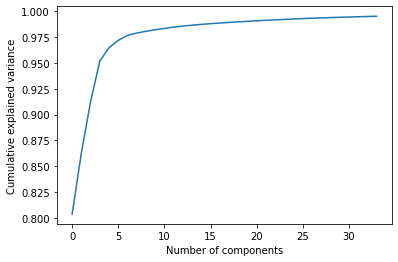

In [118]:
pca = PCA(0.995)
pca.fit(df_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel("Number of components") 
plt.ylabel("Cumulative explained variance"); 

In [119]:
projected = pca.fit_transform(df_scaled)
projected.shape

(60000, 34)

In [120]:
df_aps_raw_pca = pd.DataFrame(projected, columns = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25", "C26", "C27", "C28", "C29", "C30", "C31", "C32", "C33", "C34"])
display(df_aps_raw_pca)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34
0,0.381978,-0.089073,0.137210,0.010637,0.057561,-0.017508,-0.038228,0.010331,-0.016735,-0.001598,...,0.013458,-0.020029,0.019136,0.005336,0.003806,0.014557,-0.005117,-0.002509,-0.005638,0.009714
1,-0.224381,0.050526,0.180623,-0.032381,-0.033070,0.001566,-0.012479,-0.009840,-0.004815,-0.014345,...,0.002856,0.003680,-0.004772,0.004172,0.003944,0.001123,-0.001825,-0.001363,-0.000946,0.001098
2,-0.061179,0.022151,-0.065697,0.061365,-0.020714,0.005997,-0.014418,-0.000585,0.002970,0.007216,...,0.004015,0.003217,-0.000640,-0.003002,-0.002234,-0.000681,-0.000291,-0.000165,0.000770,-0.002271
3,-0.320269,0.012590,-0.019173,-0.030474,-0.010025,0.000947,0.006226,-0.001724,0.000688,-0.001802,...,0.000347,-0.000538,0.000002,-0.000412,0.000082,0.000081,0.000107,0.000046,-0.000007,-0.000031
4,0.427941,-0.024413,0.075702,-0.017921,0.075502,0.007733,-0.031699,0.003838,0.018591,-0.004057,...,-0.008434,0.001581,-0.001388,-0.005688,-0.004536,-0.010497,-0.001274,0.001446,-0.000872,-0.005960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.083309,-0.062689,0.131940,0.183863,-0.027617,0.023544,-0.017740,-0.004836,0.009590,-0.039670,...,-0.026914,-0.003737,0.002712,-0.021780,-0.003527,-0.000076,-0.012038,-0.001858,-0.005858,0.005951
59996,-0.173308,0.021086,-0.025893,-0.039264,-0.011897,0.001522,0.007670,-0.001328,0.001562,-0.001580,...,-0.000476,-0.000872,0.000088,-0.000743,-0.000486,0.000074,0.000028,0.000617,-0.000664,-0.000086
59997,-0.295142,0.014010,-0.020321,-0.032066,-0.009751,0.001021,0.006697,-0.001406,0.000369,-0.001908,...,0.000272,-0.000506,-0.000042,-0.000392,0.000164,0.000172,0.000169,0.000033,-0.000046,-0.000083
59998,-0.240077,-0.097206,0.146309,0.063673,-0.032610,-0.015502,-0.054719,-0.011614,-0.006552,-0.018736,...,-0.025253,-0.002975,0.000938,0.007222,0.001688,-0.009770,-0.001385,0.002635,-0.003572,0.014228


In [121]:
df_aps_raw_pca["class"] = df_aps_raw["class"]
display(df_aps_raw_pca)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C26,C27,C28,C29,C30,C31,C32,C33,C34,class
0,0.381978,-0.089073,0.137210,0.010637,0.057561,-0.017508,-0.038228,0.010331,-0.016735,-0.001598,...,-0.020029,0.019136,0.005336,0.003806,0.014557,-0.005117,-0.002509,-0.005638,0.009714,neg
1,-0.224381,0.050526,0.180623,-0.032381,-0.033070,0.001566,-0.012479,-0.009840,-0.004815,-0.014345,...,0.003680,-0.004772,0.004172,0.003944,0.001123,-0.001825,-0.001363,-0.000946,0.001098,neg
2,-0.061179,0.022151,-0.065697,0.061365,-0.020714,0.005997,-0.014418,-0.000585,0.002970,0.007216,...,0.003217,-0.000640,-0.003002,-0.002234,-0.000681,-0.000291,-0.000165,0.000770,-0.002271,neg
3,-0.320269,0.012590,-0.019173,-0.030474,-0.010025,0.000947,0.006226,-0.001724,0.000688,-0.001802,...,-0.000538,0.000002,-0.000412,0.000082,0.000081,0.000107,0.000046,-0.000007,-0.000031,neg
4,0.427941,-0.024413,0.075702,-0.017921,0.075502,0.007733,-0.031699,0.003838,0.018591,-0.004057,...,0.001581,-0.001388,-0.005688,-0.004536,-0.010497,-0.001274,0.001446,-0.000872,-0.005960,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.083309,-0.062689,0.131940,0.183863,-0.027617,0.023544,-0.017740,-0.004836,0.009590,-0.039670,...,-0.003737,0.002712,-0.021780,-0.003527,-0.000076,-0.012038,-0.001858,-0.005858,0.005951,neg
59996,-0.173308,0.021086,-0.025893,-0.039264,-0.011897,0.001522,0.007670,-0.001328,0.001562,-0.001580,...,-0.000872,0.000088,-0.000743,-0.000486,0.000074,0.000028,0.000617,-0.000664,-0.000086,neg
59997,-0.295142,0.014010,-0.020321,-0.032066,-0.009751,0.001021,0.006697,-0.001406,0.000369,-0.001908,...,-0.000506,-0.000042,-0.000392,0.000164,0.000172,0.000169,0.000033,-0.000046,-0.000083,neg
59998,-0.240077,-0.097206,0.146309,0.063673,-0.032610,-0.015502,-0.054719,-0.011614,-0.006552,-0.018736,...,-0.002975,0.000938,0.007222,0.001688,-0.009770,-0.001385,0.002635,-0.003572,0.014228,neg


# The Curse of Dimensionality

Mathematician R. Bellman named the Curse of Dimensionality in his book Dynamic Programming in 1957. According to him, the curse of dimensionality is a problem caused by the exponential growth of volume associated with adding extra dimensions to Euclidean space. This points to some problems that arise when working with large-scale data. The dimension of the dataset corresponds to the number of features in the dataset. In theory, a higher number of dimensions would allow storing more data, but in practice it results in noise and data redundancy. After processing with dimensionality reduction tools, the end result is an effectively concise dataset that fulfills its purpose of reducing the data. set for best performance and preservation of its most valuable components.

# Conclusion

   In this analysis contain a very large dataset with a huge amount of missing values, cleaning it up is the essential first step in exploring PCA. I realized that qualitative analysis materials are very difficult to polish, hence the importance of using dimensionality reduction to provide a concise analysis. 
   
I initially looked at the averages with the maximum number of missing values and then imputed the values for the remaining averages using the same Media Imputation methods. After using tools and techniques to clean  the dataset and using PCA to reduce its size so that 99.5% of the variance is retained, the dataset was resized to 80% smaller than the original  171 column size. 
 And looking at a long graph of the  number of components that can be explained, but the percentage of variance is probably  about 97.5%, but only 2 points less than 99.5%, the main components dropped dramatically to about 5. 
 
 
  The client can use this chosen percentage for decision making to draw their goals, based on their goals.


## References


The Pandas development team (2022f). pandas.DataFrame.head — pandas 1.3.4 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html [Accessed 28 oct. 2022].

Baweja, C. (2020). How to Deal with Missing Data in Python. [online] Medium. Available at: https://towardsdatascience.com/how-to-deal-with-missing-data-in-python-1f74a9112d93 [Accessed 13 nov 2022.

Yiu, T. (2019). The Curse of Dimensionality. [online] Medium. Available at: https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e [Accessed 13th of nov 2022].

Pydata.org. (2014). DataFrame — pandas 1.0.3 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/frame.html.[Accessed 12 nov 2022]